


Imports





In [ ]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
import seaborn


EDA

In [ ]:
data = pd.read_excel('/content/Ejercicio Regresión Múltiple 1.xlsx')

In [ ]:
data.describe()


,Número de anuncios publicados,Costode anuncios publicados (cientos de dolares),Venta total de piezas (miles de dolares)
count,12.000000,12.000000,12.000000
mean,9.166667,11.091667,36.033333
std,2.405801,1.833258,6.418628
min,6.000000,8.400000,22.600000
25%,7.750000,9.600000,33.200000
50%,8.500000,11.150000,36.450000
75%,11.250000,12.075000,39.050000
max,13.000000,14.300000,46.400000


In [ ]:
data.head()

,Mes,Número de anuncios publicados,Costode anuncios publicados (cientos de dolares),Venta total de piezas (miles de dolares)
0,Mayo,12,13.9,43.6
1,Junio,11,12.0,38.0
2,Julio,9,9.3,30.1
3,Agosto,7,9.7,35.3
4,Septiembre,12,12.3,46.4


In [ ]:
data['Número de anuncios publicados']

,Número de anuncios publicados
0,12
1,11
2,9
3,7
4,12
5,8
6,6
7,13
8,8
9,6


In [ ]:
data.iloc[:,1:]

,Número de anuncios publicados,Costode anuncios publicados (cientos de dolares),Venta total de piezas (miles de dolares)
0,12,13.9,43.6
1,11,12.0,38.0
2,9,9.3,30.1
3,7,9.7,35.3
4,12,12.3,46.4
5,8,11.4,34.2
6,6,9.3,30.2
7,13,14.3,40.7
8,8,10.2,38.5
9,6,8.4,22.6


In [ ]:
correlation_data = data.iloc[:,1:]

In [ ]:
corr_matrix = correlation_data.corr()

In [ ]:
corr_matrix

,Número de anuncios publicados,Costode anuncios publicados (cientos de dolares),Venta total de piezas (miles de dolares)
Número de anuncios publicados,1.000000,0.894913,0.780833
Costode anuncios publicados (cientos de dolares),0.894913,1.000000,0.820425
Venta total de piezas (miles de dolares),0.780833,0.820425,1.000000


<Axes: >

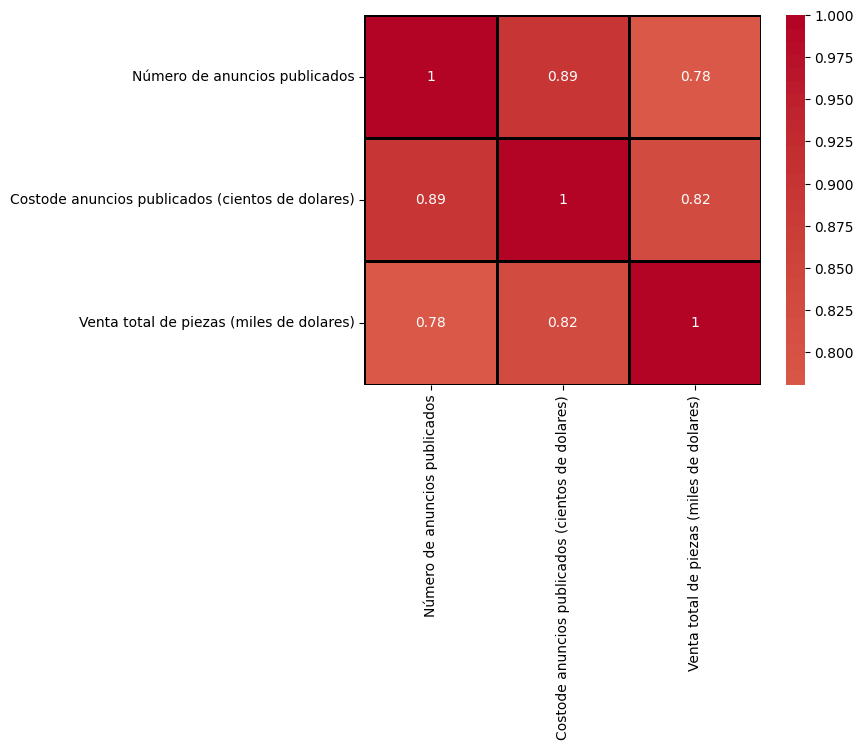

In [ ]:
seaborn.heatmap(corr_matrix, annot=True , cmap = "coolwarm", center=0, linewidths=1, linecolor='black')

Como hay una colinearidad entre los valores, eliminamos el valor con menor correlacion a la venta total de piezas (numero de anuncios publicados)

Creacion, entrenamiento del modelo

In [ ]:
x = data[['Costode anuncios publicados (cientos de dolares)']]
y = data['Venta total de piezas (miles de dolares)']

In [ ]:
model = LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


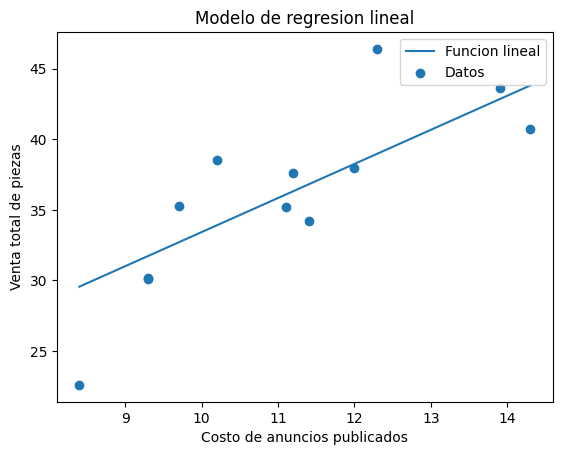

In [ ]:
x_axis = np.linspace(x.min(),x.max(),1000)
y_axis = model.predict(x_axis.reshape(-1,1))
plt.plot(x_axis,y_axis,label = 'Funcion lineal')
plt.title('Modelo de regresion lineal')
plt.xlabel('Costo de anuncios publicados')
plt.ylabel('Venta total de piezas')
plt.scatter(x,y,label = 'Datos')
plt.legend()
plt.show()

In [ ]:
error_cuad= mean_squared_error(y_test, y_pred)
error_cuad

17.933052484760367

In [ ]:
error_cuad**(1/2)

4.234743496926392

Nuestro modelo esta en promedio a 4.23 unidades de la realidad

In [ ]:
r_squared = r2_score(y_test, y_pred)


In [ ]:
r_squared

0.7077016393588563

Se concluye que el modelo si es siginificativo y aplicable a la poblacion.